In [52]:
pwd

'/content'

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [54]:
%matplotlib inline

In [55]:
df = pd.read_csv('ad.data',low_memory=False,header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.


In [56]:
# Typecasting all the columns into integers.

df.columns = df.columns.astype('int')

In [57]:
# Column 1 ->Height of the image
# Column 2 ->Width of the image
# Column 3 ->Aspect Ratio

# From the data above these first 3 columns are most important as results majorly depend on these continous variables.

In [58]:
df.dtypes.head(3)

0    object
1    object
2    object
dtype: object

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Columns: 1559 entries, 0 to 1558
dtypes: int64(1554), object(5)
memory usage: 39.0+ MB


In [60]:
# 3279 rows and 1559 columns

df.iloc[:,0:3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3279 entries, 0 to 3278
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3279 non-null   object
 1   1       3279 non-null   object
 2   2       3279 non-null   object
dtypes: object(3)
memory usage: 77.0+ KB


In [61]:
# Here missing values may exist but in the form of strings such as '?' etc...

df[0][10]

'   ?'

In [62]:
refined_df = df.iloc[:,[0,1,2,3]]
refined_df = refined_df.applymap(lambda x:'?' in x)

In [63]:
refined_df

,0,1,2,3
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
3274,False,False,False,False
3275,False,False,False,False
3276,False,False,False,False
3277,True,True,True,False


In [64]:
for i in refined_df:
  print('column['+str(i)+'] has missing values -> '+str(sum(refined_df[i])))

column[0] has missing values -> 903
column[1] has missing values -> 901
column[2] has missing values -> 910
column[3] has missing values -> 15


In [65]:
# Now let's fill the missing values with mean of each attribute

def fill_missing(df):
  for i in df:
    df[i]=df[i].replace('[?]',np.nan,regex=True).astype('float')
    df[i]=df[i].fillna(df[i].mean())   #Above, regex is used to replace all the occurences of ? with nan (regex=regular expressions)])
  return df

In [66]:
df[[0,1,2,3]] = fill_missing(df.iloc[:,[0,1,2,3]].copy()).values

In [67]:
df[0].head()

0    125.0
1     57.0
2     33.0
3     60.0
4     60.0
Name: 0, dtype: float64

In [68]:
df[3] = df[3].apply(lambda x:round(x))   # Converting float value to rounded decimal.

In [69]:
df[3].head()   # 1.0 converted to 1

0    1
1    1
2    1
3    1
4    1
Name: 3, dtype: int64

In [70]:
df[[0,1,2,3]].describe()

,0,1,2,3
count,3279.000000,3279.000000,3279.000000,3279.000000
mean,64.021886,155.344828,3.911953,0.768222
std,46.703695,110.729038,5.136153,0.422032
min,1.000000,1.000000,0.001500,0.000000
25%,32.500000,90.000000,1.279400,1.000000
50%,64.021886,150.000000,3.911953,1.000000
75%,64.021886,155.344828,3.911953,1.000000
max,640.000000,640.000000,60.000000,1.000000


<Axes: xlabel='2', ylabel='Count'>

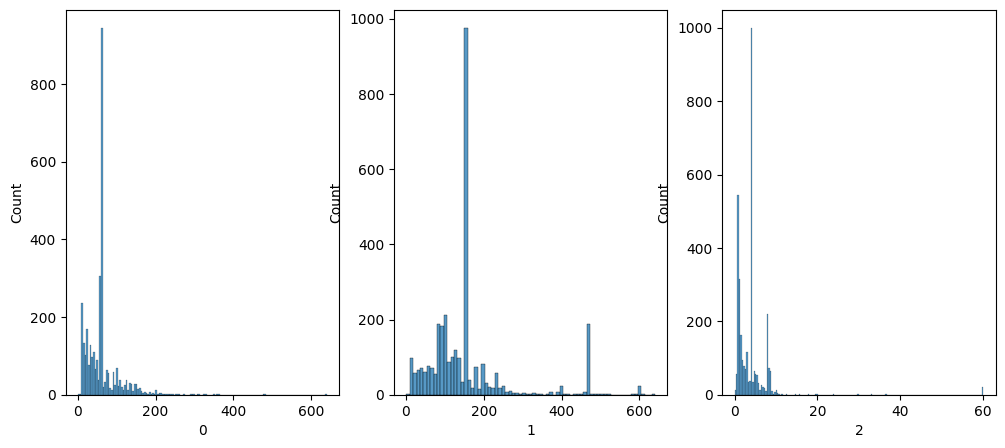

In [71]:
# Now let's see how the subplots looks for each of these 3 columns

fig,ax = plt.subplots(nrows=1,ncols=3)
fig.set_figheight(5)
fig.set_figwidth(12)
sns.histplot(df[0],ax=ax[0],)
sns.histplot(df[1],ax=ax[1])
sns.histplot(df[2],ax=ax[2])

In [72]:
# The above plot is to observe where the numerical values of each column majorly lies.

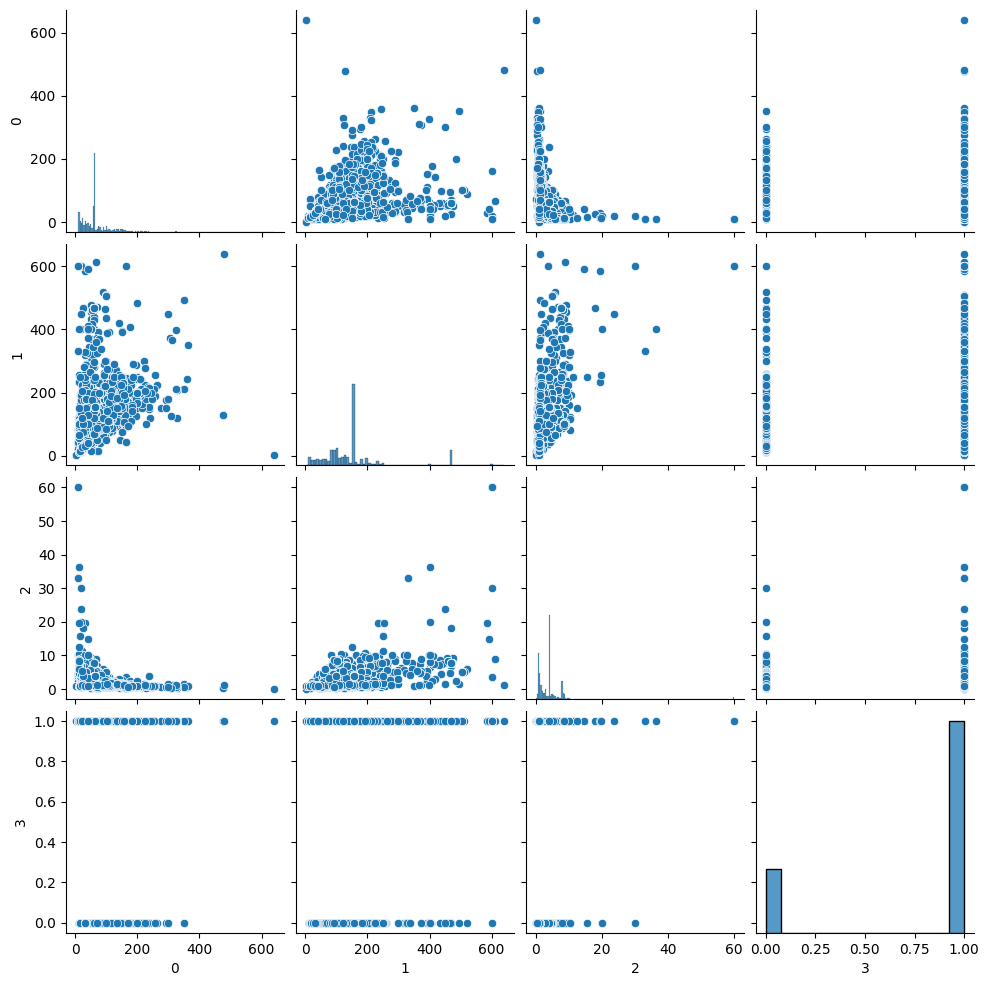

In [73]:
sns.pairplot(data=df.iloc[:,[0,1,2,3,1558]])

<ipython-input-74-41afccfbbe59>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=0,y=1558,data=df,ax=ax[0],palette={'ad.':'green','nonad.':'red'})
<ipython-input-74-41afccfbbe59>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=1,y=1558,data=df,ax=ax[1],palette={'ad.':'green','nonad.':'red'})
<ipython-input-74-41afccfbbe59>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=2,y=1558,data=df,ax=ax[2],palette={'ad.':'green','nonad.':'red'})


<Axes: xlabel='2', ylabel='1558'>

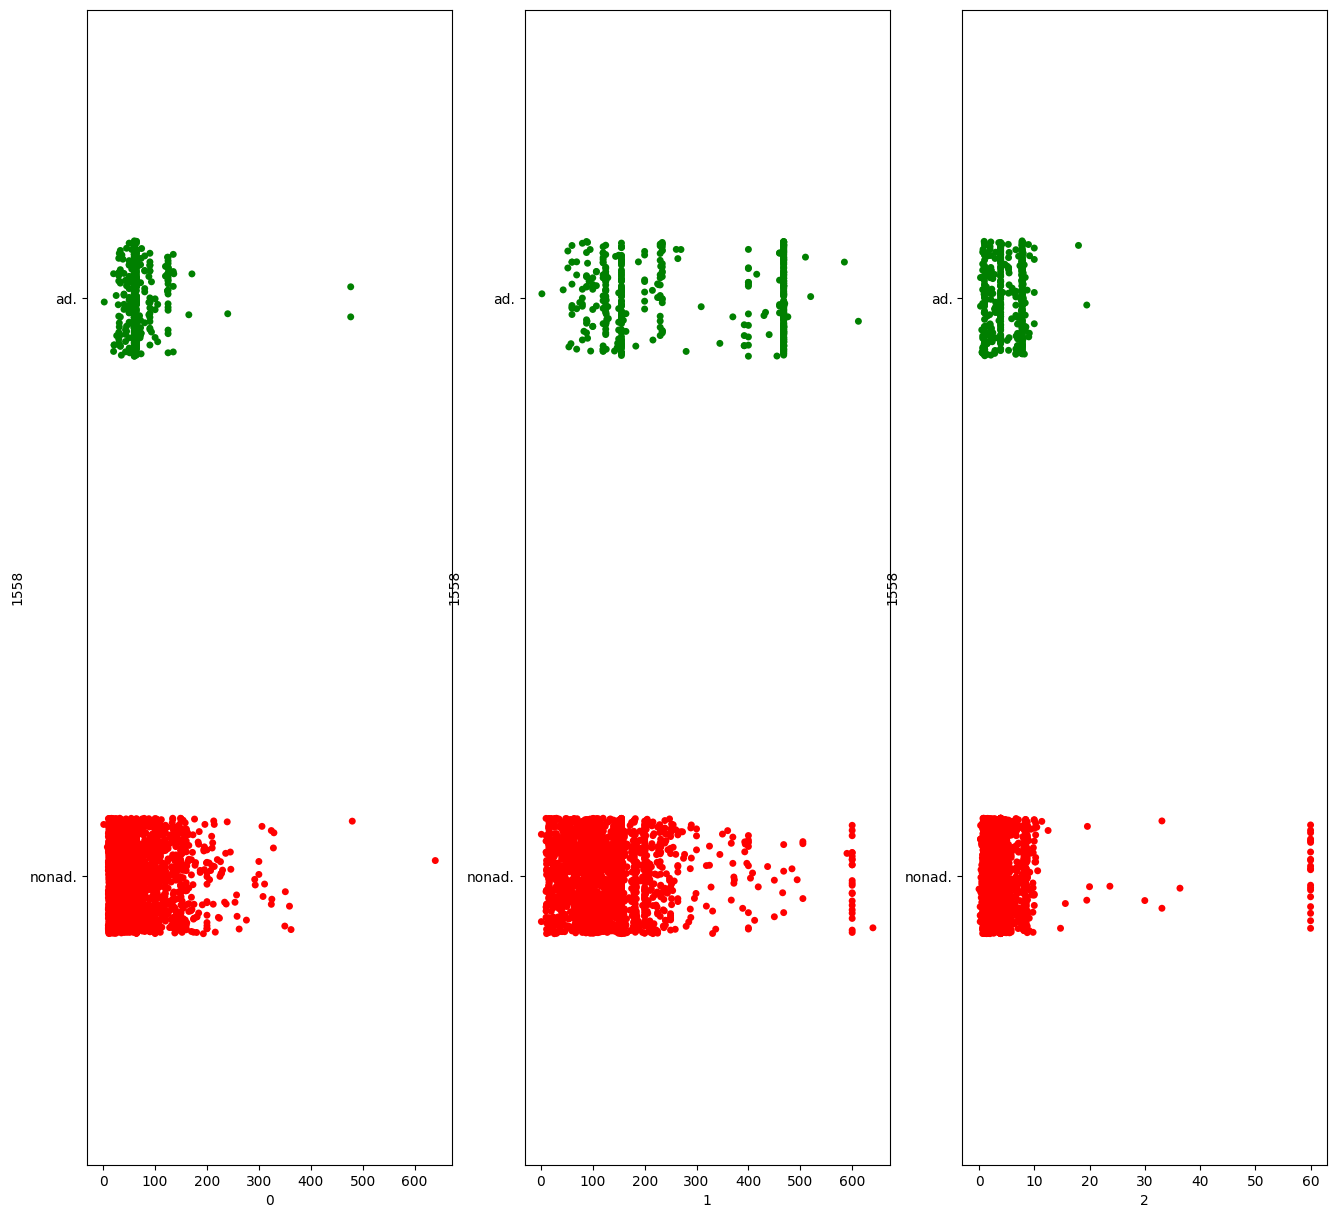

In [74]:
# Below is the strip plots to observe the variance of target label with main continous features.

fig,ax = plt.subplots(nrows=1,ncols=3)
fig.set_figheight(15)
fig.set_figwidth(16)
sns.stripplot(x=0,y=1558,data=df,ax=ax[0],palette={'ad.':'green','nonad.':'red'})
sns.stripplot(x=1,y=1558,data=df,ax=ax[1],palette={'ad.':'green','nonad.':'red'})
sns.stripplot(x=2,y=1558,data=df,ax=ax[2],palette={'ad.':'green','nonad.':'red'})

<ipython-input-75-a18d9b31ba9e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df[1558],palette='husl')


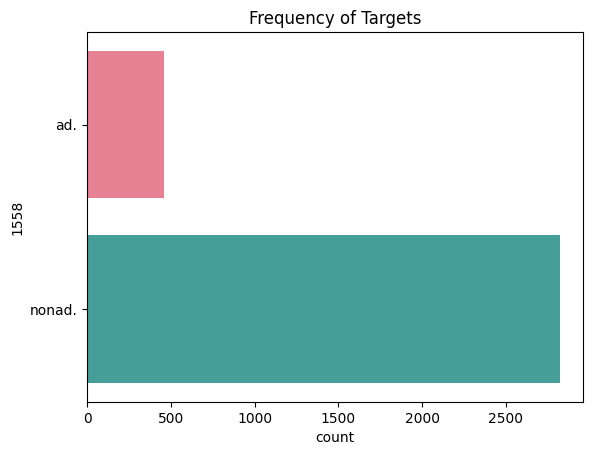

In [75]:
# For some reason this below code is not working:
# sns.countplot(data=df,y=1558,palette='husl')

#So, this code worked instead
sns.countplot(df[1558],palette='husl')
plt.title('Frequency of Targets')
plt.show()

In [76]:
# We can see there is more values of nonad. category than ad. category.

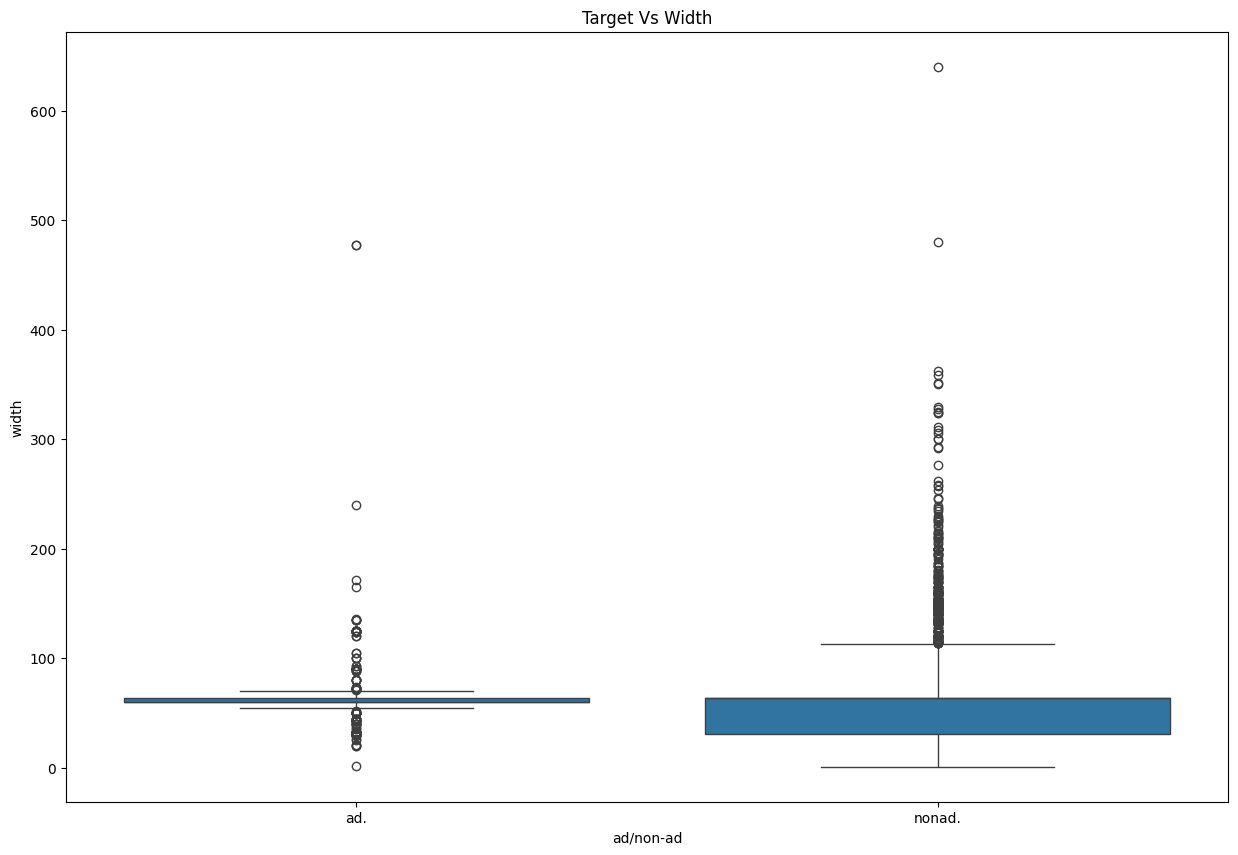

In [77]:
# Now if we want to see the how ad and nonad varies w.r.t each column, we can use boxplot
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x=1558,y=0)
plt.xlabel('ad/non-ad')
plt.ylabel('width')
plt.title('Target Vs Width')
plt.show()

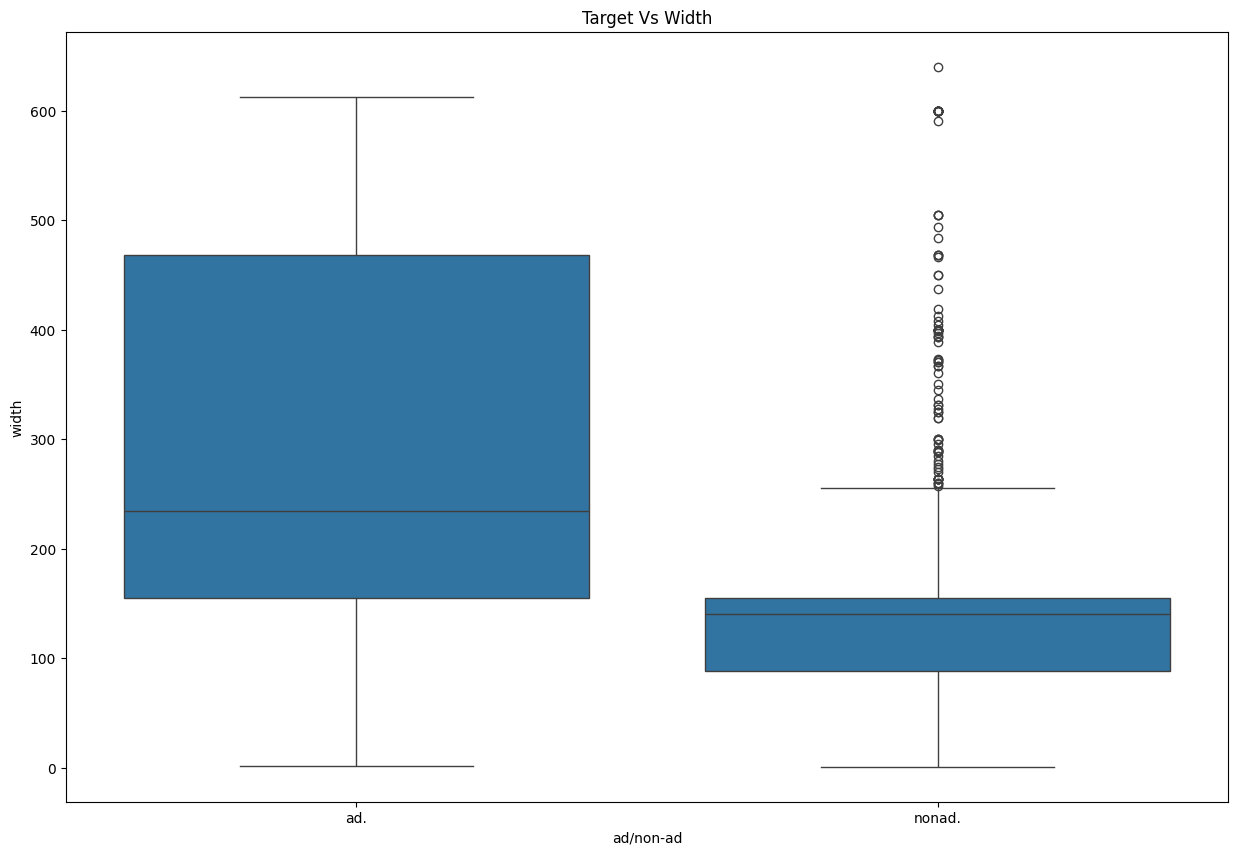

In [78]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x=1558,y=1)
plt.xlabel('ad/non-ad')
plt.ylabel('width')
plt.title('Target Vs Width')
plt.show()

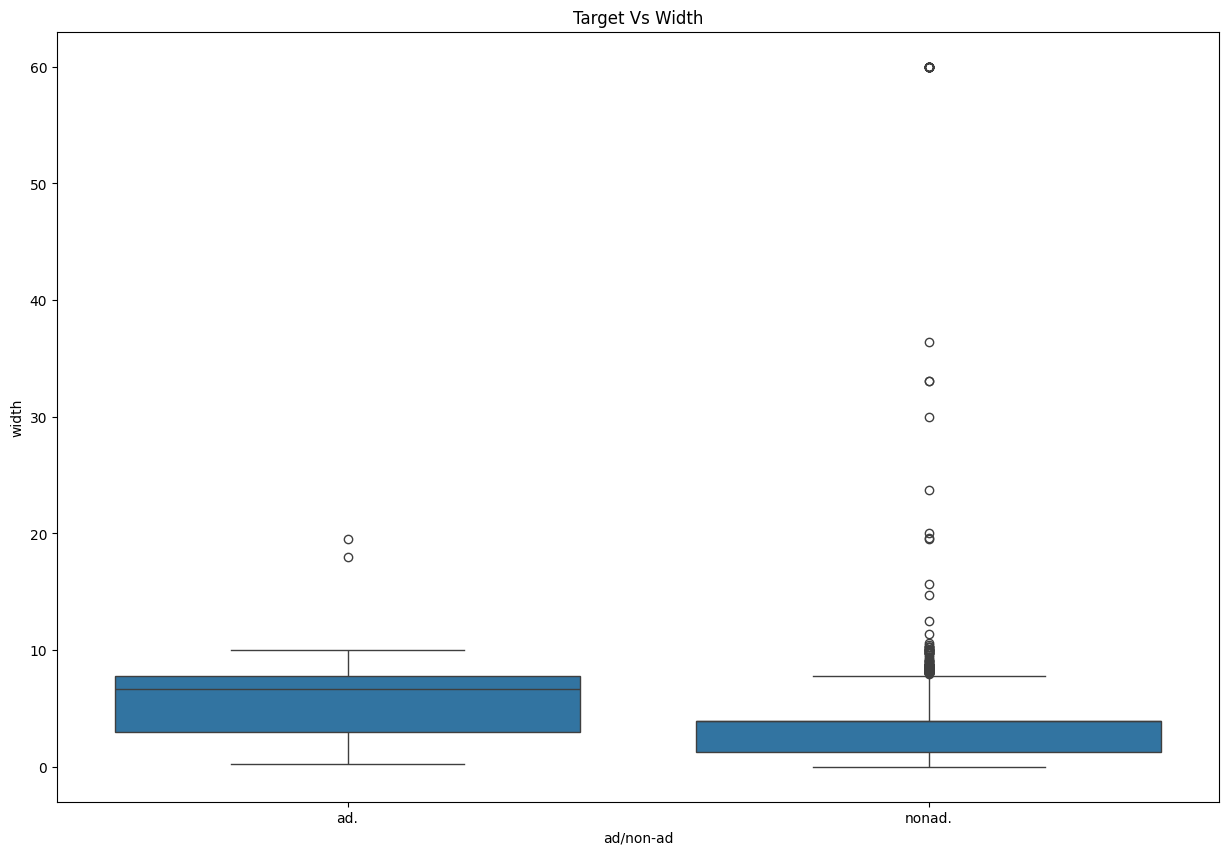

In [79]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df,x=1558,y=2)
plt.xlabel('ad/non-ad')
plt.ylabel('width')
plt.title('Target Vs Width')
plt.show()

In [80]:
# So, we can observe column 1 i.e "width" is a major feature which differs a lot for ad vs nonad.

# Width of ad is much more as compared to non-ad.

# No.of outliers is more in non-ads.

In [81]:
# Now, converting the categorical data into numerical data of 0s and 1s.
# 0 for non ad image
# 1 for ad image.

df.iloc[:,-1] = df.iloc[:,-1].replace(['ad.','nonad.'],[1,0])

<ipython-input-81-9a08a01d5dd9>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,-1] = df.iloc[:,-1].replace(['ad.','nonad.'],[1,0])


In [82]:
df[1558].head()

0    1
1    1
2    1
3    1
4    1
Name: 1558, dtype: int64

In [83]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Defining the processed features and processed labels for our model.

In [84]:
# We observed that in first 3 columns, there were high values of variance.
# So, we go for feature scaling which brings high and low values to the same magnitude.

from sklearn.preprocessing import StandardScaler
scaled = StandardScaler()
x=scaled.fit_transform(x)

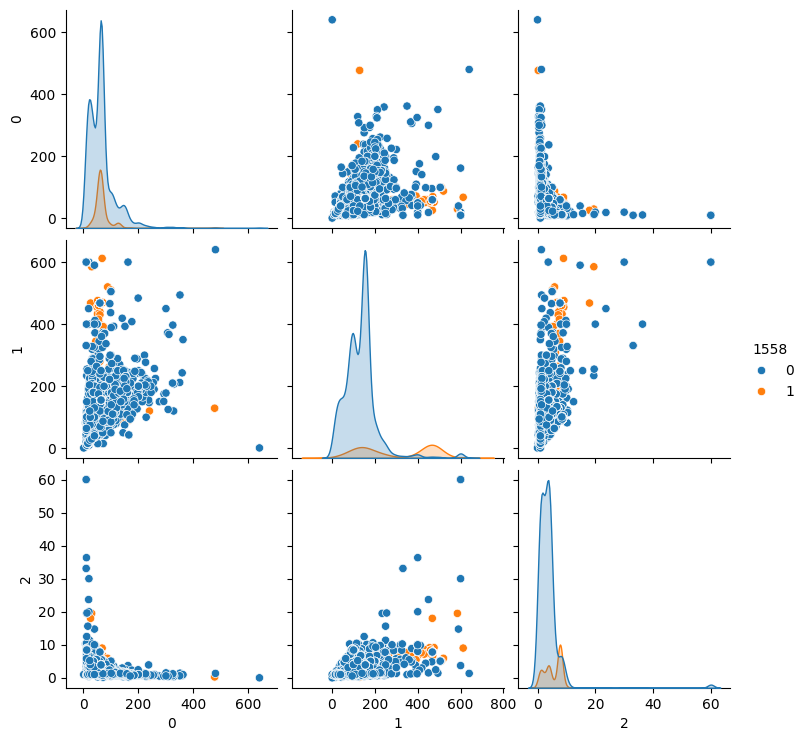

In [85]:
sns.pairplot(data=df.iloc[:,[0,1,2,1558]],hue=1558)
plt.show()

In [86]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [87]:
# Since all the values are numeric and continuous and there are lot of independent features, we can apply the GaussianNB algorithm here.

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

gnb_model = GaussianNB()
gnb_model.fit(x_train,y_train)

y_pred_gnb = gnb_model.predict(x_test)

print('Classification report of GNB model:\n ',classification_report(y_test,y_pred_gnb))

Classification report of GNB model:
                precision    recall  f1-score   support

           0       0.97      0.77      0.86       836
           1       0.41      0.87      0.55       148

    accuracy                           0.79       984
   macro avg       0.69      0.82      0.71       984
weighted avg       0.89      0.79      0.82       984



In [88]:
# So, the gaussianNB classifier gives an f1 score of 82% or 0.82.

In [89]:
# Now let's try for KNN

from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

y_pred_knn = knn_model.predict(x_test)

print('Classification report of KNN model:\n ',classification_report(y_test,y_pred_knn))

Classification report of KNN model:
                precision    recall  f1-score   support

           0       0.95      0.99      0.97       836
           1       0.95      0.71      0.81       148

    accuracy                           0.95       984
   macro avg       0.95      0.85      0.89       984
weighted avg       0.95      0.95      0.95       984



In [90]:
# So, here KNN algo gives f1 score of 95% or 0.95 with no.of neighbors=5

In [91]:
# Now with SVM

from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(x_train,y_train)

y_pred_svm = svm_model.predict(x_test)

print('Classification report of SVM model:\n ',classification_report(y_test,y_pred_svm))

Classification report of SVM model:
                precision    recall  f1-score   support

           0       0.96      1.00      0.98       836
           1       0.98      0.78      0.87       148

    accuracy                           0.96       984
   macro avg       0.97      0.89      0.92       984
weighted avg       0.97      0.96      0.96       984



In [92]:
# SVM model gives an f1 score of 96% or 0.96.

In [93]:
from sklearn.metrics import confusion_matrix

print('Below is the confusion matrix for GNB model:\n',confusion_matrix(y_test,y_pred_gnb))

print('Below is the confusion matrix for KNN model:\n',confusion_matrix(y_test,y_pred_knn))

print('Below is the confusion matrix for SVM model:\n',confusion_matrix(y_test,y_pred_svm))

Below is the confusion matrix for GNB model:
 [[647 189]
 [ 19 129]]
Below is the confusion matrix for KNN model:
 [[831   5]
 [ 43 105]]
Below is the confusion matrix for SVM model:
 [[834   2]
 [ 33 115]]


In [94]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [95]:
model = Sequential()

# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [96]:
model.fit(x=x_train,
          y=y_train,
          epochs=5,
          batch_size=256,
          validation_data=(x_test, y_test),
          )

Epoch 1/5
9/9 [==============================] - 1s 35ms/step - loss: 0.4916 - val_loss: 0.3040
Epoch 2/5
9/9 [==============================] - 0s 15ms/step - loss: 0.2882 - val_loss: 0.1974
Epoch 3/5
9/9 [==============================] - 0s 13ms/step - loss: 0.2035 - val_loss: 0.1506
Epoch 4/5
9/9 [==============================] - 0s 14ms/step - loss: 0.1534 - val_loss: 0.1267
Epoch 5/5
9/9 [==============================] - 0s 13ms/step - loss: 0.1224 - val_loss: 0.1125


<Axes: >

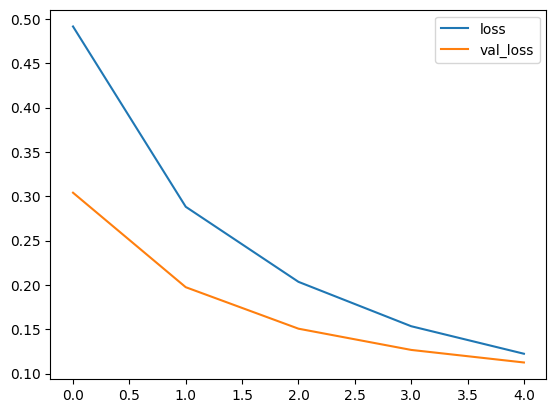

In [97]:
losses = pd.DataFrame(model.history.history)

losses[['loss','val_loss']].plot()

In [98]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(n_estimators=100)

rfc_model.fit(x_train,y_train)

rfc_pred = rfc_model.predict(x_test)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       836
           1       0.96      0.89      0.92       148

    accuracy                           0.98       984
   macro avg       0.97      0.94      0.95       984
weighted avg       0.98      0.98      0.98       984



In [99]:
print(confusion_matrix(y_test,rfc_pred))

[[830   6]
 [ 16 132]]


In [100]:
# So, no.of misclassified points in GNB model: 189+19=208
# No.of misclassified points in KNN model: 5+43=48
# No.of misclassified points in SVM model: 2+33=35
# No.of misclassified points in RandomForest model: 6+16=22

# So, we can observe RandomForest model performed the best for our dataset.